In [1]:
import nkutil
import netket as nk
import e2h
import lattice
import matplotlib.pyplot as plt
import numpy as np

j2s = [0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.75, 1, 1.25, 1.5, 1.75, 2]


lat = lattice.SquareLattice([4, 4], [1, 1])
graph = nkutil.convert_lattice(lat, False, 3)
hi = nk.hilbert.Spin(s=0.5, total_sz=0.0, graph=graph)


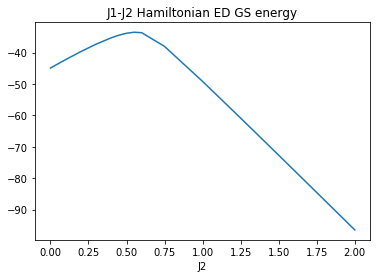

In [3]:
vals = []
for j2 in j2s:
    ham = nkutil.j1j2_ham(hi, j2, 'none')
    exact = nk.exact.lanczos_ed(ham, first_n=1, compute_eigenvectors=True)
    vals.append(exact.eigenvalues[0])
    
plt.title("J1-J2 Hamiltonian ED GS energy")
plt.xlabel("J2")
plt.plot(j2s, vals)

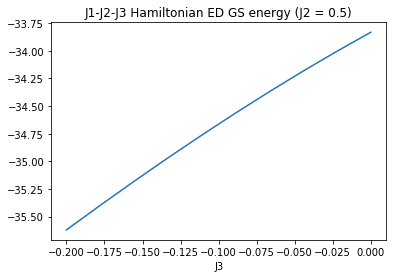

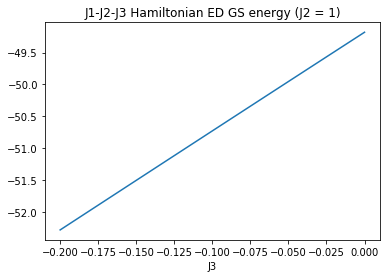

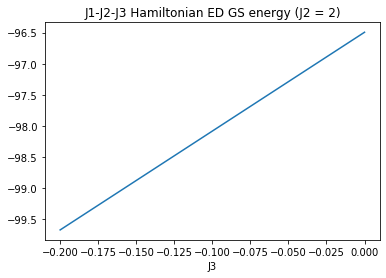

In [7]:
def plot_for_j2(j2):
    vals = []
    j3s = -np.linspace(0, 0.4, 10)
    for j3 in j3s:
        ham = nkutil.j1j2_ham(hi, j2, 'none', j3)
        exact = nk.exact.lanczos_ed(ham, first_n=1, compute_eigenvectors=True)
        vals.append(exact.eigenvalues[0])

    plt.figure()
    plt.title("J1-J2-J3 Hamiltonian ED GS energy (J2 = {0})".format(j2))
    plt.xlabel("J3")
    plt.plot(j3s / 2, vals)
    
plot_for_j2(0.5)
plot_for_j2(1)
plot_for_j2(2)

In [9]:
import ops

aniso = ops.symmetrized_operators(lat, n_point=2, dist=3, symmetries='trans_x,trans_y,rot')
aniso = [op for op in aniso if 'one_site' not in op.tags]
aniso_op = [nkutil.convert_operator(hi, aniso[i].terms, aniso[i].coefs, []) for i in range(9)]
aniso0 = nkutil.convert_operator(hi, aniso[0].terms, aniso[0].coefs, [])
aniso1 = nkutil.convert_operator(hi, aniso[2].terms, aniso[2].coefs, [])
aniso2 = nkutil.convert_operator(hi, aniso[3].terms, aniso[3].coefs, [])
aniso3 = nkutil.convert_operator(hi, aniso[5].terms, aniso[5].coefs, [])
aniso4 = nkutil.convert_operator(hi, aniso[6].terms, aniso[6].coefs, [])
aniso5 = nkutil.convert_operator(hi, aniso[8].terms, aniso[8].coefs, [])

sz = nkutil.convert_operator(hi, [[(i, 3, 1)] for i in range(15)], [1] * 16, [])

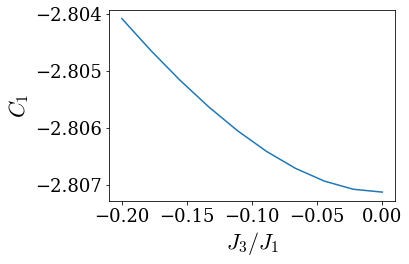

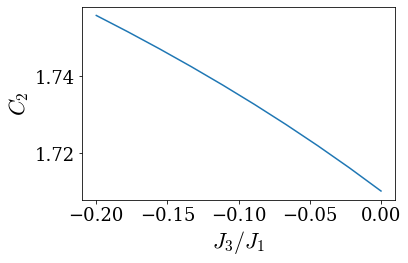

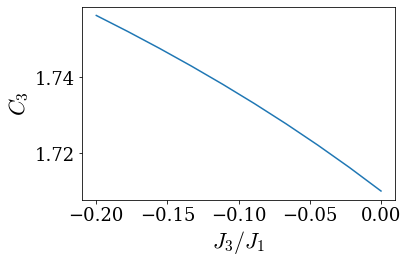

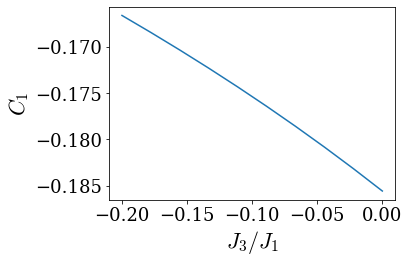

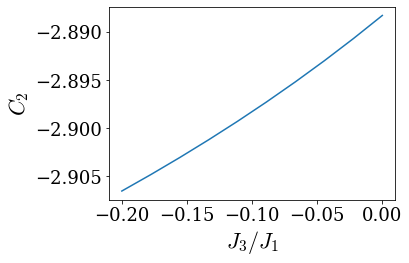

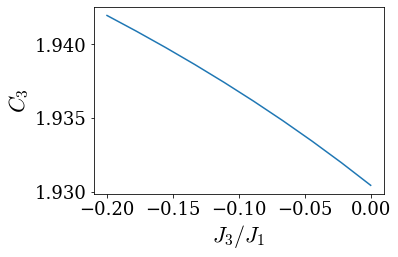

In [23]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('mathtext', fontset='cm')

def plot_for_j2_corr(j2, names):
    vals = []
    vals1 = []
    vals2 = []
    
    j3s = -np.linspace(0, 0.4, 10)
    for j3 in j3s:
        ham = nkutil.j1j2_ham(hi, j2, 'none', j3)
        exact = nk.exact.lanczos_ed(ham, first_n=1, compute_eigenvectors=True)
        
        vals.append(2 * np.real(np.vdot(exact.eigenvectors[0], aniso0.to_sparse() * exact.eigenvectors[0]))
                    + np.real(np.vdot(exact.eigenvectors[0], aniso1.to_sparse() * exact.eigenvectors[0])))
        vals1.append(2 * np.real(np.vdot(exact.eigenvectors[0], aniso2.to_sparse() * exact.eigenvectors[0]))
                    + np.real(np.vdot(exact.eigenvectors[0], aniso3.to_sparse() * exact.eigenvectors[0])))
        vals2.append(2 * np.real(np.vdot(exact.eigenvectors[0], aniso4.to_sparse() * exact.eigenvectors[0]))
                    + np.real(np.vdot(exact.eigenvectors[0], aniso5.to_sparse() * exact.eigenvectors[0])))

        
    plt.figure(figsize=[6, 4])
    plt.xlabel("$J_3/J_1$", fontsize=22)
    plt.ylabel("$C_1$", fontsize=22)
    plt.plot(j3s / 2, np.array(vals) / 16)
    plt.tight_layout()
    plt.savefig("/mnt/z/Users/Kevin/Pictures/" + names[0], dpi=300)
    
    plt.figure(figsize=[6, 4])
    plt.xlabel("$J_3/J_1$", fontsize=22)
    plt.ylabel("$C_2$", fontsize=22)
    plt.plot(j3s / 2, np.array(vals1) / 16)
    plt.tight_layout()
    plt.savefig("/mnt/z/Users/Kevin/Pictures/" + names[1], dpi=300)
    
    plt.figure(figsize=[6, 4])
    plt.xlabel("$J_3/J_1$", fontsize=22)
    plt.ylabel("$C_3$", fontsize=22)
    plt.plot(j3s / 2, np.array(vals2) / 16)
    plt.tight_layout()
    plt.savefig("/mnt/z/Users/Kevin/Pictures/" + names[2], dpi=300)
    
plot_for_j2_corr(0, ["ex5.1.png", "ex5.2.png", "ex5.3.png"])
#plot_for_j2_corr(0.5)
plot_for_j2_corr(1, ["ex5.4.png", "ex5.5.png", "ex5.6.png"])
#plot_for_j2_corr(1.5)

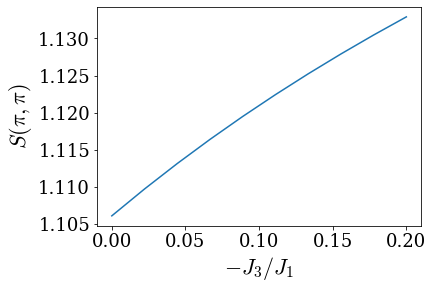

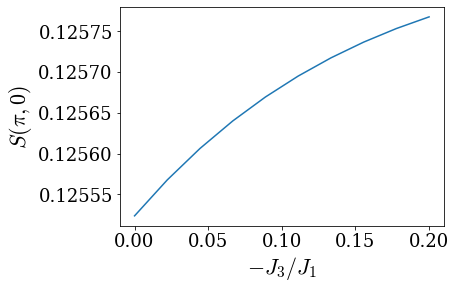

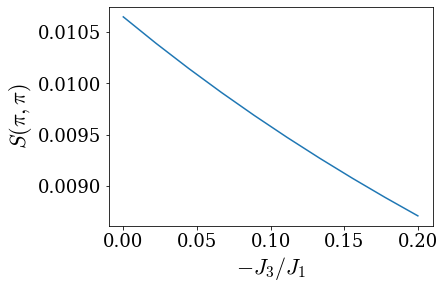

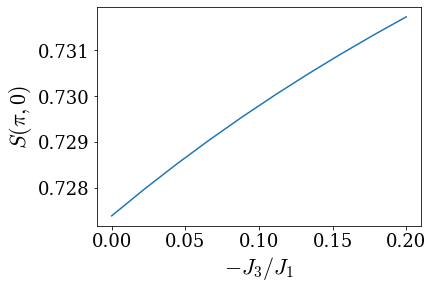

In [33]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('mathtext', fontset='cm')

terms = []
coefs = []
for i in range(4):
    for j in range(4):
        for s in range(1, 4):
            terms.append([(0, s, 0), (4*j+i, s, 0)])
            coefs.append(np.cos(i*np.pi+j*np.pi)+1j*np.sin(i*np.pi+j*np.pi))
pipi = nkutil.convert_operator(hi, terms, coefs, [])

terms = []
coefs = []
for i in range(4):
    for j in range(4):
        for s in range(1, 4):
            terms.append([(0, s, 0), (4*j+i, s, 0)])
            coefs.append(np.cos(i*np.pi)+1j*np.sin(i*np.pi))
pizero = nkutil.convert_operator(hi, terms, coefs, [])

def plot_for_j2_corr(j2, names):
    vals = []
    vals1 = []
    vals2 = []
    
    j3s = -np.linspace(0, 0.4, 10)
    for j3 in j3s:
        ham = nkutil.j1j2_ham(hi, j2, 'none', j3)
        exact = nk.exact.lanczos_ed(ham, first_n=1, compute_eigenvectors=True)
        
        vals.append(np.vdot(exact.eigenvectors[0], pipi.to_sparse() * exact.eigenvectors[0]))
        vals1.append(np.vdot(exact.eigenvectors[0], pizero.to_sparse() * exact.eigenvectors[0]))

        
    plt.figure(figsize=[6, 4])
    plt.xlabel("$-J_3/J_1$", fontsize=22)
    plt.ylabel("$S(\\pi, \\pi)$", fontsize=22)
    plt.plot(-j3s / 2, np.real(np.array(vals)) / 16)
    plt.tight_layout()
    plt.subplots_adjust(left=0.24, bottom=0.20, right=0.99, top=0.96)
    plt.savefig("/mnt/z/Users/Kevin/Pictures/" + names[0], dpi=300)
    
    plt.figure(figsize=[6, 4])
    plt.xlabel("$-J_3/J_1$", fontsize=22)
    plt.ylabel("$S(\\pi, 0)$", fontsize=22)
    plt.plot(-j3s / 2, np.real(np.array(vals1)) / 16)
    plt.tight_layout()
    plt.subplots_adjust(left=0.24, bottom=0.20, right=0.99, top=0.96)
    plt.savefig("/mnt/z/Users/Kevin/Pictures/" + names[1], dpi=300)
    
plot_for_j2_corr(0, ["j2.0.pipi.png", "j2.0.pizero.png"])
#plot_for_j2_corr(0.5)
plot_for_j2_corr(1, ["j2.1.pipi.png", "j2.1.pizero.png"])
#plot_for_j2_corr(1.5)

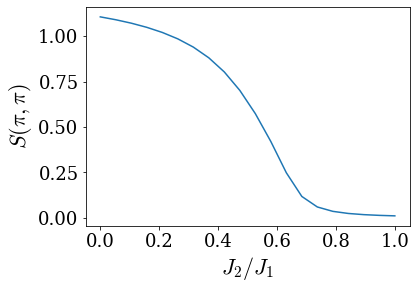

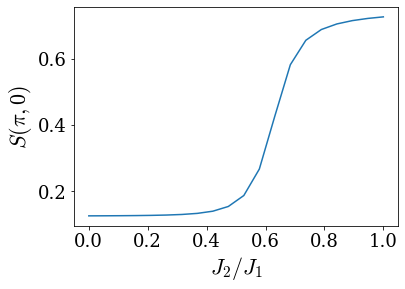

In [35]:
def plot_across_j2():
    vals = []
    vals1 = []
    
    j3s = np.linspace(0, 1, 20)
    for j3 in j3s:
        ham = nkutil.j1j2_ham(hi, j3, 'none')
        exact = nk.exact.lanczos_ed(ham, first_n=1, compute_eigenvectors=True)
        
        vals.append(np.vdot(exact.eigenvectors[0], pipi.to_sparse() * exact.eigenvectors[0]))
        vals1.append(np.vdot(exact.eigenvectors[0], pizero.to_sparse() * exact.eigenvectors[0]))
    plt.figure()
    plt.ylabel("$S(\\pi, \\pi)$", fontsize=22)
    plt.xlabel("$J_2/J_1$", fontsize=22)
    plt.plot(j3s, np.array(vals)/16)
    plt.subplots_adjust(left=0.24, bottom=0.20, right=0.99, top=0.96)
    
    plt.figure()
    plt.ylabel("$S(\\pi, 0)$", fontsize=22)
    plt.xlabel("$J_2/J_1$", fontsize=22)
    plt.plot(j3s, np.array(vals1)/16)
    plt.subplots_adjust(left=0.24, bottom=0.20, right=0.99, top=0.96)
    
    plt.savefig("/mnt/z/Users/Kevin/Pictures/j2_order_pizero", dpi=300)
plot_across_j2()

In [105]:
wf = np.zeros_like(exact.eigenvectors[0])
u = 1
d = -1
wf[hi.state_to_number([u,u,u,u,d,d,d,d,u,u,u,u,d,d,d,d])] = 1/2
wf[hi.state_to_number([d,d,d,d,u,u,u,u,d,d,d,d,u,u,u,u])] = 1/2
wf[hi.state_to_number([u,d,u,d,u,d,u,d,u,d,u,d,u,d,u,d])] = 1/2
wf[hi.state_to_number([d,u,d,u,d,u,d,u,d,u,d,u,d,u,d,u])] = 1/2

wf = exact.eigenvectors[0]
print(np.real(np.vdot(wf, aniso_op[3].to_sparse() * wf)))
print(np.real(np.vdot(wf, aniso_op[4].to_sparse() * wf)))
print(np.real(np.vdot(wf, aniso_op[5].to_sparse() * wf)))

uu = 0
ud = 0
dd = 0
du = 0
for i in range(len(wf)):
    state = hi.number_to_state(i)
    if state[0] > 0 and state[5] > 0:
        uu += np.abs(wf[i])**2
    if state[0] > 0 and state[5] < 0:
        ud += np.abs(wf[i])**2
    if state[0] < 0 and state[5] > 0:
        du += np.abs(wf[i])**2
    if state[0] < 0 and state[5] < 0:
        dd += np.abs(wf[i])**2
        
print(np.sqrt(uu), np.sqrt(ud))

-15.98972572099374
-15.98972572099374
-15.989723668392195
0.3537074044524298 0.6122835054400729


In [182]:
sz = [[1, 0], [0, -1]]
sy = [[0, -1j], [1j, 0]]
sx = [[0, 1], [1, 0]]
coupling = np.kron(sx, sx) + np.kron(sy, sy) + np.kron(sz, sz)
inv_coupling = -np.kron(sx, sx) - np.kron(sy, sy) + np.kron(sz, sz)


bondops = [coupling * 0, coupling * 0, coupling * 0.0001, coupling * -1.]
bondops_colors = [1, 2, 3, 4]

j3_ham = nk.operator.GraphOperator(hi, bondops=bondops, bondops_colors=bondops_colors)

exact2 = nk.exact.lanczos_ed(j3_ham, first_n=32, compute_eigenvectors=True)

KeyboardInterrupt: 

In [188]:
print(exact2.eigenvalues)
print(sorted(exact2.eigenvalues))

wf = exact2.eigenvectors[np.argsort(exact2.eigenvalues)[4]]
print(np.real(np.vdot(wf, aniso_op[6].to_sparse() * wf)))
print(np.real(np.vdot(wf, aniso_op[7].to_sparse() * wf)))
print(np.real(np.vdot(wf, aniso_op[8].to_sparse() * wf)))
for i in range(len(wf)):
    if np.abs(wf[i]) > 0.1:
        print(np.abs(wf[i]), hi.number_to_state(i))

[-6.0000000000000195, -4.000000000000051, -6.000000000000038, -6.000000000000059, -4.000000000000042, -6.000000000000044, -4.000000000000043, -6.0000000000000595, -6.000000000000059, -8.000000000000096, -8.000000000000039, -8.00000000000006, -8.00000000000009, -7.999999999999985, -6.000000000000009, -7.999999999999993, -4.0000000000000435, -6.000000000000022, -8.000000000000021, -8.000000000000027, -5.999999999999989, -8.000000000000028, -8.000000000000036, -7.999999999999997, -6.0000000000000036, -8.000000000000007, -6.000000000000031, -8.000000000000009, -8.000000000000002, -6.000000000000012, -5.999999999999996, -4.000000000000041]
[-8.000000000000096, -8.00000000000009, -8.00000000000006, -8.000000000000039, -8.000000000000036, -8.000000000000028, -8.000000000000027, -8.000000000000021, -8.000000000000009, -8.000000000000007, -8.000000000000002, -7.999999999999997, -7.999999999999993, -7.999999999999985, -6.0000000000000595, -6.000000000000059, -6.000000000000059, -6.00000000000004

In [36]:
op_reps = {}
mats = []
sites = []
for op, coef in zip(aniso[5].terms, aniso[5].coefs):
    # get the canonical operator order
    # the variable key has the site indexes replaced with normalized indexes, e.g. [5, 6, 35, 5] -> [0, 1, 2, 0]
    # this is because all operators with the same site topology share the same matrix representation
    key, sites_ = ops.canonical_operator_order(op, [])
    key = tuple(key)

    if key not in op_reps:
        # get the matrix representation of the operator
        op_reps[key] = ops.operator_representation(list(key), True, True)

    if np.all(op_reps[key] == 0):
        # zero matrix - don't need to measure this
        pass
    else:
        mats.append(coef * op_reps[key])
        sites.append(sites_)


*** This configuration is called rj23c7sfhj4hpwxao4gntw2nnze4mr5gqvu7epqltbsgrmjadf6a
*** [J1J2, 2-site SU2 (2,0) (0,-2)]
*** Configuration:  {'mpi_threads': 1, 'threading_index': None, 'threading_total': None, 'machine_seed': None, 'machine_sigma': None, 'machine_type': 'j1j2_exact', 'machine_fc_hidden_factor': None, 'machine_rbms_alpha': None, 'machine_from_file': 'cnn_exact/j1_1_j2_1.0.wf', 'machine_j1j2_c4': None, 'machine_j1j2_rot_type': None, 'exact_eigens': None, 'sampler_seed': 4321, 'geom_from_file': None, 'geom_len_x': 4, 'geom_len_y': 4, 'geom_pb_x': True, 'geom_pb_y': True, 'geom_rot_sym': False, 'ham_j2': 1.0, 'ham_rotation': 'none', 'ops_symmetries': 'trans_x,trans_y,rot,su2', 'ops_discard': 'one_site', 'ops_dist': 3, 'ops_only_aniso': 0, 'opt_discard_samples': None, 'opt_learning_rate': None, 'opt_samples': None, 'opt_diag_shift': None, 'opt_method': None, 'opt_iters': None, 'opt_batches': None, 'meas_batches': 1, 'meas_chains': 16, 'meas_discard_samples': None, 'meas_sa

0 -49.52534176759265 0.9996728061732625
1 -46.76323949802126 1.874952819603371e-15
2 -45.59682362149825 3.957390565009708e-15
3 -45.596823621496405 2.0862889719104477e-16
4 -45.59682362149605 5.3072333128159466e-17
5 -45.59682362149594 2.7755575615628914e-17
6 -45.59682362149528 2.5514002453611344e-16
7 -45.59682362149523 4.785447810286878e-17
8 -43.3246215168487 5.97287577703737e-16
9 -43.32462151684783 1.0630852823056531e-16
10 -43.3246215168476 3.5415136611006334e-17
11 -40.71077505878091 2.186100195070586e-13
12 -40.70792651576051 3.6030495252200237e-13
13 -40.70792651575715 8.443988145820289e-16
14 -40.70559198038408 0.0007520250899876161
15 -40.528865237455044 9.482065503549529e-17
16 -40.528865237454106 6.700794677829363e-16
17 -40.52886523745156 1.3574215529398706e-16
18 -40.527608779362374 6.909694533986147e-17
19 -40.52760877936112 1.2840417024585349e-15
20 -40.527608779359696 3.762111236574247e-17
21 -40.52760877935948 2.4257678788983054e-17
22 -40.52760877935834 4.419992957

0 -49.86909237794348 0.9996948363756156
1 -47.09215745645224 1.565597307430994e-14
2 -45.939251475494494 6.276329265110152e-15
3 -45.939251475493734 2.1588771306901906e-16
4 -45.93925147549288 9.13452394803599e-18
5 -45.939251475492846 5.3860300581534765e-17
6 -45.93925147549177 1.8054463245622665e-16
7 -45.939251475491695 2.481496958850152e-17
8 -43.66989028425228 4.753220754115479e-15
9 -43.66989028425193 7.552684047163959e-17
10 -43.669890284251615 4.0990210000057785e-17
11 -40.975314611408855 6.439540287558396e-16
12 -40.96437900347531 3.3111413643905556e-16
13 -40.964379003474555 8.416295834091098e-14
14 -40.955288113652074 0.0014255216024879462
15 -40.789449393230825 1.1256120497299477e-15
16 -40.789449393230775 1.3723752340689963e-17
17 -40.78944939322951 7.878442949297749e-17
18 -40.78514861537813 8.077306185017008e-17
19 -40.785148615377835 1.965703604650645e-15
20 -40.785148615377054 1.61892197444555e-16
21 -40.785148615376954 5.724751741422974e-17
22 -40.78514861537561 7.539

0 -50.213192789500525 0.99970552243526
1 -47.42192836420881 4.7093585881363255e-15
2 -46.28207940630039 5.66919548758498e-15
3 -46.282079406298635 2.2301825219878386e-16
4 -46.28207940629834 2.7769124835677133e-17
5 -46.28207940629833 1.2266347333466993e-17
6 -46.28207940629828 1.241873016165035e-17
7 -46.28207940629679 1.8619006149354548e-16
8 -44.01548969420774 1.1992913033813499e-15
9 -44.0154896942072 4.699436501433646e-16
10 -44.01548969420685 1.4425809266921902e-16
11 -41.249607597424216 2.046323989163572e-14
12 -41.22607498141688 7.416830457584993e-17
13 -41.226074981413745 1.1279108309143089e-14
14 -41.20616772024455 0.0020285551918570862
15 -41.05723220519109 9.97374993734643e-17
16 -41.057232205190914 3.934898390892065e-16
17 -41.057232205189834 3.3598592658935055e-17
18 -41.054610036086345 1.4846841437362876e-17
19 -41.054610036086345 2.3438194195477673e-16
20 -41.05461003608599 4.43536653549981e-16
21 -41.05461003608497 5.013892917353286e-17
22 -41.05461003608471 6.04747718

0 -50.55762466531027 0.9997060042374507
1 -47.75250363514977 1.336885555457667e-15
2 -46.62528610793697 1.6824349578853056e-15
3 -46.62528610793531 1.734723475976807e-17
4 -46.62528610793455 9.889445383256551e-18
5 -46.62528610793448 4.640385298237959e-17
6 -46.625286107934016 1.5048726154098802e-16
7 -46.62528610793335 4.242986104350744e-17
8 -44.36140019863965 1.5143398632690927e-15
9 -44.361400198638144 7.740931511913567e-16
10 -44.36140019863718 6.2311579702907e-17
11 -41.53246901034474 1.5022739355383707e-14
12 -41.492559640199 1.502439786404452e-16
13 -41.492559640195 5.990121446272726e-14
14 -41.45811860369825 0.002567809803085985
15 -41.369554342571426 3.82033216616167e-17
16 -41.36955434257059 1.556905636987408e-16
17 -41.36955434256892 2.5744722464373908e-17
18 -41.369554342567916 4.988567244618763e-17
19 -41.369554342566786 7.317147725252928e-15
20 -41.36955434256652 2.2952332087709876e-17
21 -41.3315482289531 2.7640857572414597e-17
22 -41.331548228952755 7.849611336833645e-

0 -50.902371074252265 0.9996972941536418
1 -48.08383881720937 4.8822059480288575e-15
2 -46.96885192796548 9.643772629593432e-15
3 -46.96885192796467 2.8413544659981215e-17
4 -46.96885192796414 1.4488835837920476e-16
5 -46.968851927963904 7.996680103938912e-17
6 -46.968851927963605 2.063081476116683e-16
7 -46.96885192796258 7.244417918960238e-17
8 -44.70760401953472 2.737827832865224e-15
9 -44.70760401953336 2.7956155452368258e-15
10 -44.70760401953288 2.203033343556302e-16
11 -41.8228013134728 4.5841163324857866e-15
12 -41.76342065071966 7.449218517580031e-17
13 -41.76342065071518 1.077319023637456e-14
14 -41.71104659221318 0.0030487687305040694
15 -41.70103205189889 6.765421556309548e-17
16 -41.701032051898515 1.2542621311593019e-16
17 -41.70103205189667 4.908071987301223e-17
18 -41.701032051896405 6.66021432257475e-17
19 -41.70103205189612 3.299328260816342e-14
20 -41.701032051894906 5.654673035050527e-17
21 -41.611776298369094 1.4939309478156761e-15
22 -41.6117762983687 2.3699010935

0 -51.247416348908416 0.9996802938070588
1 -48.41589311566351 1.8184668582387977e-15
2 -47.31275869780729 2.763773288367982e-15
3 -47.31275869780575 1.7351998665963238e-18
4 -47.31275869780532 8.457555311126093e-17
5 -47.31275869780484 4.623537547557342e-17
6 -47.312758697804625 5.299431161395102e-17
7 -47.312758697804 2.3286683962439374e-16
8 -45.05408492772012 3.1557038937635217e-15
9 -45.05408492771936 2.2905356311746797e-15
10 -45.05408492771861 5.538235921235976e-15
11 -42.119619190754584 1.8044459848467814e-16
12 -42.038287173036565 1.609443683235262e-14
13 -42.038287173036515 2.323837569125172e-16
14 -42.034647845647264 2.722189631084451e-17
15 -42.034647845646916 3.7527806648313014e-17
16 -42.03464784564495 5.71199950253535e-14
17 -42.034647845643676 3.127317220692751e-17
18 -42.03464784564336 1.0340742696362814e-16
19 -42.034647845641906 2.5744722464373908e-17
20 -41.96487248140054 0.0034758391466347804
21 -41.89734619262477 1.5234802144588182e-16
22 -41.897346192623495 1.3918

0 -51.592745961245505 0.9996558082737417
1 -48.74862898643559 1.3118435538267617e-15
2 -47.65698958476347 3.572920628981763e-15
3 -47.65698958476147 7.473417450352271e-17
4 -47.65698958476142 1.705684004216481e-16
5 -47.65698958476046 3.141717836627692e-17
6 -47.65698958475965 4.1714599331759725e-17
7 -47.65698958475959 1.980017965333463e-16
8 -45.400828057187496 1.1489350597635122e-14
9 -45.40082805718701 3.850821612896917e-15
10 -45.40082805718495 6.753654075508281e-16
11 -42.42205714325896 4.658499689234552e-16
12 -42.3693016739053 1.302314116208532e-16
13 -42.36930167390083 5.869123868725193e-15
14 -42.36930167390032 2.4655053005362233e-17
15 -42.3693016738997 6.932385638691615e-17
16 -42.369301673899606 7.49151535309508e-17
17 -42.36930167389882 5.720150378618427e-17
18 -42.31682748644903 1.5800512403243152e-16
19 -42.316827486446755 9.070993129729139e-15
20 -42.2195297545989 0.0038524230721901013
21 -42.18774064901026 7.456982227516416e-16
22 -42.18774064900912 1.0769853908679878

0 -51.93834641345484 0.9996245581677168
1 -49.082011786929456 3.149248932938854e-15
2 -48.00152896243901 5.565261116080268e-15
3 -48.00152896243854 8.328056056920883e-17
4 -48.00152896243773 1.7510452491825717e-16
5 -48.00152896243754 1.459231405488224e-16
6 -48.00152896243692 1.1796119636642288e-16
7 -48.0015289624367 9.476100656760399e-17
8 -45.747819748015736 1.1669447689942482e-14
9 -45.74781974801498 2.751166532998715e-15
10 -45.7478197480141 1.479374780465618e-14
11 -42.72936604613709 2.8538310188176833e-16
12 -42.704744400876585 9.16617116488085e-17
13 -42.7047444008699 1.857551909807559e-16
14 -42.704744400869714 1.4857225527797953e-16
15 -42.704744400866915 3.933846467480048e-17
16 -42.704744400866225 7.345995797852658e-17
17 -42.70474440086601 6.7854080741697e-17
18 -42.59874585805341 2.969368287472575e-16
19 -42.59874585805334 2.730636731281977e-16
20 -42.48249429180166 2.885772394887715e-13
21 -42.4824942917987 1.107337856265735e-15
22 -42.48249429179575 5.226366883618069e-

0 -52.28420514174935 0.9995871899706011
1 -49.416009474482934 2.2998325057532506e-15
2 -48.34636229680904 8.862807326597325e-15
3 -48.34636229680806 2.4444217419384483e-16
4 -48.346362296807825 7.850462293418876e-17
5 -48.34636229680722 5.485677294651096e-18
6 -48.34636229680653 1.1195352145514476e-16
7 -48.34636229680634 2.595600833469892e-16
8 -46.095047412506204 1.2014251491909317e-14
9 -46.09504741250507 2.1406755841810086e-14
10 -46.0950474125038 1.3282994362815976e-14
11 -43.04090360718891 1.4977456222779366e-15
12 -43.040870827079544 6.573045573418438e-16
13 -43.04087082707806 2.8339775571885856e-16
14 -43.04087082707516 3.5415566443019483e-16
15 -43.0408708270742 5.5192599870769894e-17
16 -43.04087082707347 1.8542076143962482e-17
17 -43.04087082707321 4.120652957816004e-17
18 -42.88377908723517 2.3969760940415664e-15
19 -42.88377908723388 5.521764068853398e-16
20 -42.781190704051376 2.76014988303556e-16
21 -42.78119070404897 4.538070802915677e-15
22 -42.7811907040486 2.73091198

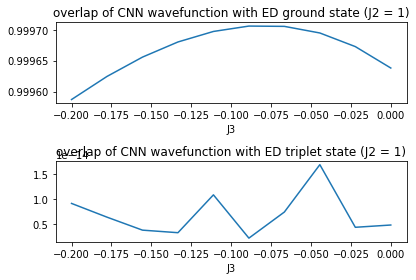

<Figure size 432x288 with 0 Axes>

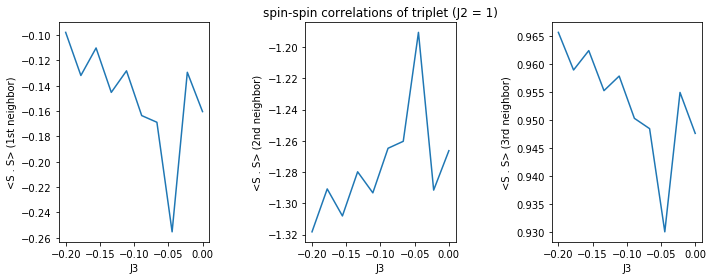

In [20]:
def plot_for_j2_overlap(j2, f):
    vals = []
    vals1 = []
    vals2 = []
    vals3 = []
    vals4 = []
    
    cnn_file = "cnn_exact/j1_1_j2_{0}.wf"
    data = e2h.main(['python3 e2h.py', '4x4', '-machine_type', 'j1j2_exact', '-ops_dist', '3', '-ham_j2', j2, '-machine_from_file', cnn_file.format(f), '-meas_full_sample', '1', '-meas_full_sample_sym_c4', '1', '-meas_full_sample_sym_t', '1', '-ops_symmetries', 'trans_x,trans_y,rot,su2', '-meas_wf_rotation', 'neel' if float(j2) <= 0.5 else 'striped'])
        
    cnn_wf = e2h.extract_wavefunction(data['cfg'], data['hi'], data['ham'], data['ffnn'], data['lat'], character=(1, -1) if float(j2) > 2 else (1, 1))
    
    print("corr_cnn = ", (2 * np.real(np.vdot(cnn_wf, aniso0.to_sparse() * cnn_wf))
                + np.real(np.vdot(cnn_wf, aniso1.to_sparse() * cnn_wf))) / 32)
    print("corr_cnn = ", (2 * np.real(np.vdot(cnn_wf, aniso2.to_sparse() * cnn_wf))
        + np.real(np.vdot(cnn_wf, aniso3.to_sparse() * cnn_wf))) / 32)
    print("corr_cnn = ", (2 * np.real(np.vdot(cnn_wf, aniso4.to_sparse() * cnn_wf))
                + np.real(np.vdot(cnn_wf, aniso5.to_sparse() * cnn_wf))) / 32)
    
    j3s = -np.linspace(0, 0.4, 10)
    for j3 in j3s:
        ham = nkutil.j1j2_ham(hi, j2, 'none', j3)
        exact = nk.exact.lanczos_ed(ham, first_n=256, compute_eigenvectors=True)
        
        args = np.argsort(exact.eigenvalues)
        
        vals.append(np.abs(np.vdot(cnn_wf, exact.eigenvectors[args[0]])))

        fac1 = np.vdot(cnn_wf, exact.eigenvectors[args[1]])
        fac2 = np.vdot(cnn_wf, exact.eigenvectors[args[2]])
        fac3 = np.vdot(cnn_wf, exact.eigenvectors[args[3]])
        
        for i in range(256):
            print(i, exact.eigenvalues[args[i]], np.abs(np.vdot(cnn_wf, exact.eigenvectors[args[i]])))

        norm = np.linalg.norm([fac1, fac2, fac3])

        singlet = exact.eigenvectors[args[1]] * fac1 / norm + exact.eigenvectors[args[2]] * fac2 / norm + exact.eigenvectors[args[3]] * fac3 / norm
        vals1.append(np.abs(np.vdot(cnn_wf, singlet)))
        
        vals2.append(2 * np.real(np.vdot(singlet, aniso0.to_sparse() * singlet))
                    + np.real(np.vdot(singlet, aniso1.to_sparse() * singlet)))
        vals3.append(2 * np.real(np.vdot(singlet, aniso2.to_sparse() * singlet))
                    + np.real(np.vdot(singlet, aniso3.to_sparse() * singlet)))
        vals4.append(2 * np.real(np.vdot(singlet, aniso4.to_sparse() * singlet))
                    + np.real(np.vdot(singlet, aniso5.to_sparse() * singlet)))
        
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title("overlap of CNN wavefunction with ED ground state (J2 = {0})".format(j2))
    plt.xlabel("J3")
    plt.plot(j3s / 2, vals)

    plt.subplot(2, 1, 2)
    plt.title("overlap of CNN wavefunction with ED triplet state (J2 = {0})".format(j2))
    plt.xlabel("J3")
    plt.plot(j3s / 2, vals1)
    plt.tight_layout()

    plt.figure()
    plt.figure(figsize=[10, 4])
    plt.subplot(1, 3, 1)
    plt.xlabel("J3")
    plt.ylabel("<S . S> (1st neighbor)")
    plt.plot(j3s / 2, np.array(vals2) / 32)
    plt.subplot(1, 3, 2)
    plt.title("spin-spin correlations of triplet (J2 = {0})".format(j2))
    plt.xlabel("J3")
    plt.ylabel("<S . S> (2nd neighbor)")
    plt.plot(j3s / 2, np.array(vals3) / 32)
    plt.subplot(1, 3, 3)
    plt.xlabel("J3")
    plt.ylabel("<S . S> (3rd neighbor)")
    plt.plot(j3s / 2, np.array(vals4) / 32)
    plt.tight_layout()

#plot_for_j2_overlap(0, '0.0')
#plot_for_j2_overlap(0.5, '0.5')
plot_for_j2_overlap(1, '1.0')
#plot_for_j2_overlap(1.5, '1.5')
